In [1]:
import sys
import os
from src.data import CICIDS2017
from src.data.utils import balanced_sample, encode_labels
from sklearn.model_selection import train_test_split
from src.models.tabnet import TabNetModel
from src.models.ml import PreConfigured_LogisticRegression, PreConfigured_RandomForest, PreConfigured_LinearSVC, PreConfigured_DecisionTree, PreConfigured_KNeighbors
from src.pipelines.utils import train_and_evaluate, plot_accuracies, evaluate

import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

### Data

In [ ]:
data = CICIDS2017(pca=False, classes_mapping=True)
data.load()
data = balanced_sample(data.data, "Label", 10000)
# x, y = encode_labels(data, "Label")
x = data.drop(columns=["Label"]).values
y = data["Label"].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

2025-03-07 18:07:44,548 - INFO - Loading dataset...


In [5]:
data.data["Label"].value_counts()

Label
BENIGN          2096484
DoS              193748
DDoS             128016
Port Scan         90819
Brute Force        9152
Web Attack         2143
Bot                1953
Infiltration         36
Heartbleed           11
Name: count, dtype: int64

### Models

#### Preparing

In [3]:
logreg = PreConfigured_LogisticRegression()
svc = PreConfigured_LinearSVC()
randomforest = PreConfigured_RandomForest()
kneighbors = PreConfigured_KNeighbors()
decision_tree = PreConfigured_DecisionTree()
tabnet = TabNetModel()

c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


#### Training

c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
2025-03-07 01:35:51,786 - INFO - Cross-validation scores: [0.81543152 0.81261726 0.82106004 0.81988743 0.81003752 0.809803
 0.81444992 0.80975839 0.81515365 0.81726484]
2025-03-07 01:35:51,787 - INFO - Mean cross-validation score: 0.8145
2025-03-07 01:35:51,879 - INFO - Model saved to models\ml\logreg.zip


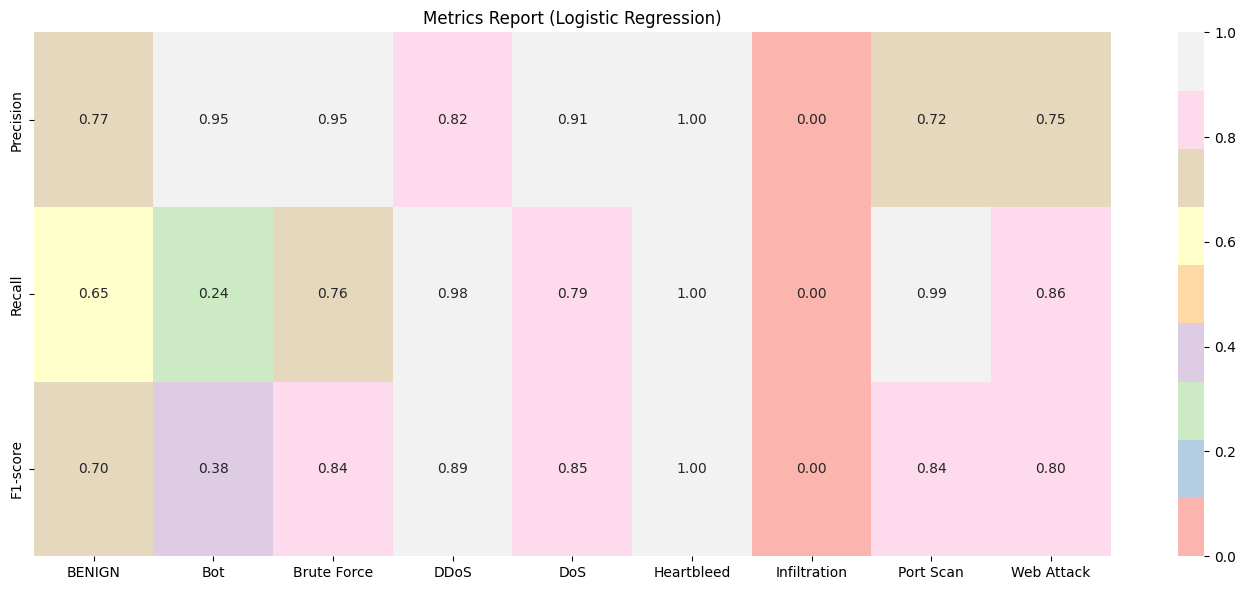

In [4]:
logreg_results = train_and_evaluate(
    logreg,
    "Logistic Regression",
    X_train,
    y_train,
    X_test,
    y_test,
    cv=10
)
logreg.save_model("logreg")

c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
2025-03-07 01:42:49,163 - INFO - Cross-validation scores: [0.81730769 0.82434334 0.83090994 0.82692308 0.82833021 0.8217636
 0.82312925 0.81749941 0.82758621 0.8296974 ]
2025-03-07 01:42:49,164 - INFO - Mean cross-validation score: 0.8247
2025-03-07 01:42:49,249 - INFO - Model saved to models\ml\svc.zip


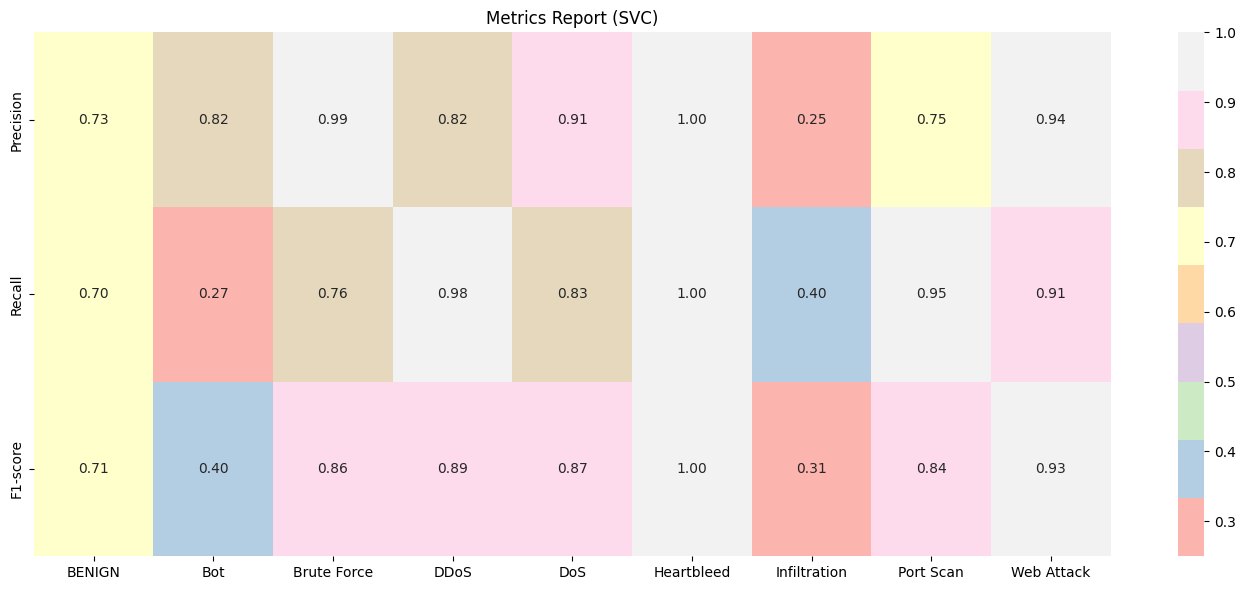

In [5]:
svc_results = train_and_evaluate(
    svc,
    "SVC",
    X_train,
    y_train,
    X_test,
    y_test,
    cv=10
)
svc.save_model("svc")

2025-03-07 01:42:52,996 - INFO - Cross-validation scores: [0.99108818 0.99108713 0.99003166 0.99096986 0.99050076]
2025-03-07 01:42:52,997 - INFO - Mean cross-validation score: 0.9907
2025-03-07 01:42:53,098 - INFO - Model saved to models\ml\randomforest.zip


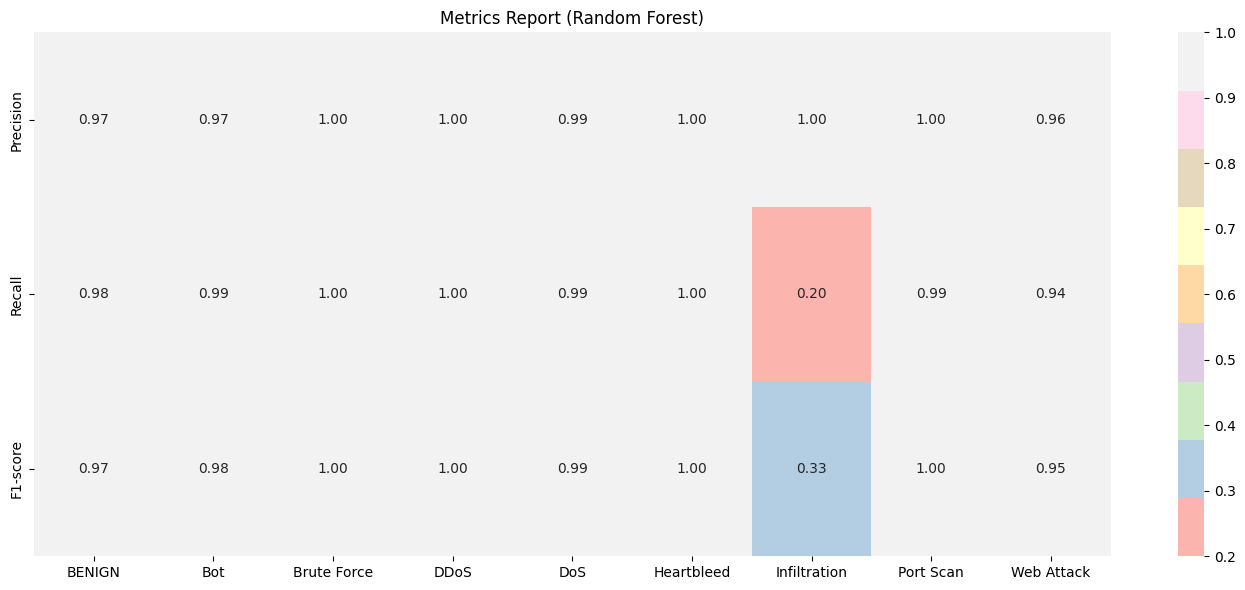

In [6]:
randomforest_results = train_and_evaluate(
    randomforest,
    "Random Forest",
    X_train,
    y_train,
    X_test,
    y_test,
    cv=5
)
randomforest.save_model("randomforest")

2025-03-07 01:42:54,874 - INFO - Cross-validation scores: [0.95743433 0.96575583 0.96376217 0.96047848 0.96024393]
2025-03-07 01:42:54,875 - INFO - Mean cross-validation score: 0.9615
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^

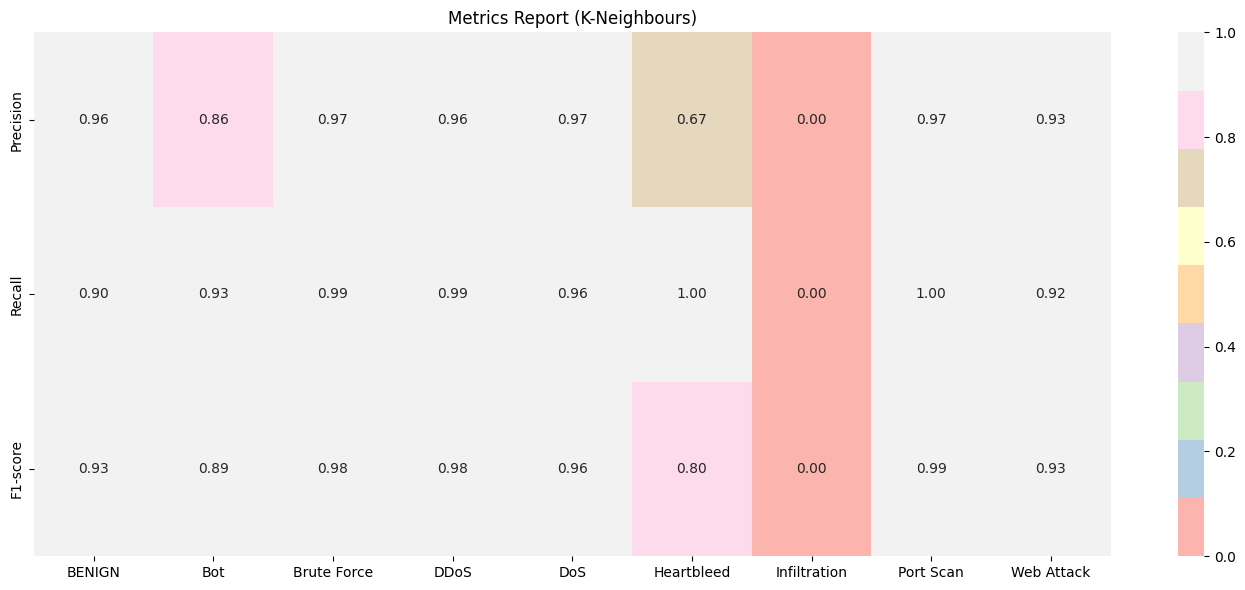

In [7]:
kneighbors_results = train_and_evaluate(
    kneighbors,
    "K-Neighbours",
    X_train,
    y_train,
    X_test,
    y_test,
    cv=5
)
kneighbors.save_model("kneighbors")

2025-03-07 01:42:57,623 - INFO - Cross-validation scores: [0.98839118 0.988038   0.98909347 0.99108713 0.98932802]
2025-03-07 01:42:57,624 - INFO - Mean cross-validation score: 0.9892
2025-03-07 01:42:57,825 - INFO - Model saved to models\ml\decision_tree.zip


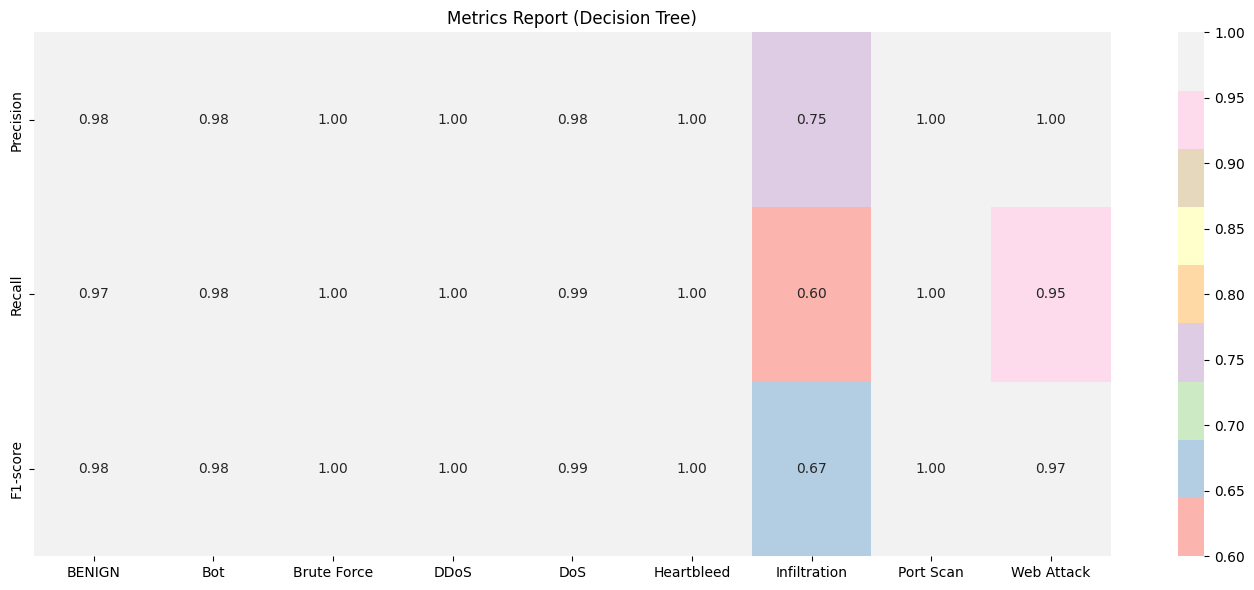

In [8]:
decision_tree_results = train_and_evaluate(
    decision_tree,
    "Decision Tree",
    X_train,
    y_train,
    X_test,
    y_test,
    cv=5
)
decision_tree.save_model("decision_tree")

2025-03-07 01:42:57,910 - INFO - Pretraining for TabNet...


{'max_epochs': 100, 'batch_size': 1024, 'patience': 10}
epoch 0  | loss: 10.54117| val_0_unsup_loss_numpy: 1.203969955444336|  0:00:04s
epoch 1  | loss: 1.23615 | val_0_unsup_loss_numpy: 1.0525399446487427|  0:00:09s
epoch 2  | loss: 1.21687 | val_0_unsup_loss_numpy: 1.0050699710845947|  0:00:13s
epoch 3  | loss: 1.40692 | val_0_unsup_loss_numpy: 0.9957399964332581|  0:00:18s
epoch 4  | loss: 1.20541 | val_0_unsup_loss_numpy: 1.100100040435791|  0:00:23s
epoch 5  | loss: 1.08307 | val_0_unsup_loss_numpy: 0.9605299830436707|  0:00:27s
epoch 6  | loss: 1.58214 | val_0_unsup_loss_numpy: 0.9663699865341187|  0:00:32s
epoch 7  | loss: 1.17488 | val_0_unsup_loss_numpy: 0.9431999921798706|  0:00:36s
epoch 8  | loss: 1.74191 | val_0_unsup_loss_numpy: 0.931850016117096|  0:00:41s
epoch 9  | loss: 1.06558 | val_0_unsup_loss_numpy: 0.9154700040817261|  0:00:45s
epoch 10 | loss: 0.95039 | val_0_unsup_loss_numpy: 0.9227200150489807|  0:00:50s
epoch 11 | loss: 1.20652 | val_0_unsup_loss_numpy: 0.920

c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
2025-03-07 01:47:19,812 - INFO - Training TabNet model...


epoch 56 | loss: 1.12841 | val_0_unsup_loss_numpy: 0.7416999936103821|  0:04:19s

Early stopping occurred at epoch 56 with best_epoch = 46 and best_val_0_unsup_loss_numpy = 0.7386299967765808


c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining
  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 1.12876 | val_accuracy: 0.8559  |  0:00:03s
epoch 1  | loss: 0.28831 | val_accuracy: 0.9166  |  0:00:07s
epoch 2  | loss: 0.19051 | val_accuracy: 0.9333  |  0:00:11s
epoch 3  | loss: 0.17601 | val_accuracy: 0.70663 |  0:00:15s
epoch 4  | loss: 0.17905 | val_accuracy: 0.9348  |  0:00:19s
epoch 5  | loss: 0.14823 | val_accuracy: 0.9514  |  0:00:23s
epoch 6  | loss: 0.12887 | val_accuracy: 0.95647 |  0:00:27s
epoch 7  | loss: 0.12317 | val_accuracy: 0.9545  |  0:00:31s
epoch 8  | loss: 0.11316 | val_accuracy: 0.81086 |  0:00:35s
epoch 9  | loss: 0.10335 | val_accuracy: 0.90262 |  0:00:39s
epoch 10 | loss: 0.10835 | val_accuracy: 0.7861  |  0:00:43s
epoch 11 | loss: 0.12014 | val_accuracy: 0.85196 |  0:00:47s
epoch 12 | loss: 0.10622 | val_accuracy: 0.9439  |  0:00:51s
epoch 13 | loss: 0.10467 | val_accuracy: 0.91547 |  0:00:54s
epoch 14 | loss: 0.10001 | val_accuracy: 0.72558 |  0:00:58s
epoch 15 | loss: 0.09752 | val_accuracy: 0.78976 |  0:01:02s
epoch 16 | loss: 0.0955 

c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
2025-03-07 01:49:10,261 - INFO - Train Accuracy: 0.9557
2025-03-07 01:49:10,262 - INFO - Validation Accuracy: 0.9565


Successfully saved model at models\tabnet\tabnet.zip


c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

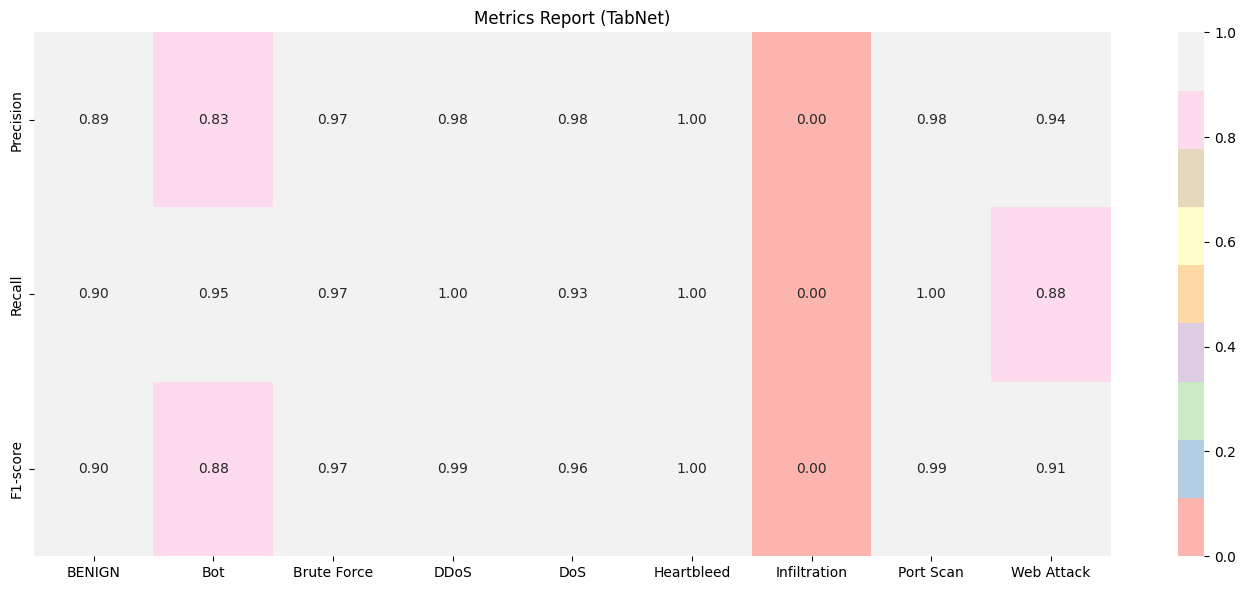

In [9]:
tabnet_results = train_and_evaluate(
    tabnet,
    "TabNet",
    X_train,
    y_train,
    X_test,
    y_test,
)
tabnet.save("tabnet")

dict_keys(['loss', 'lr', 'val_accuracy'])


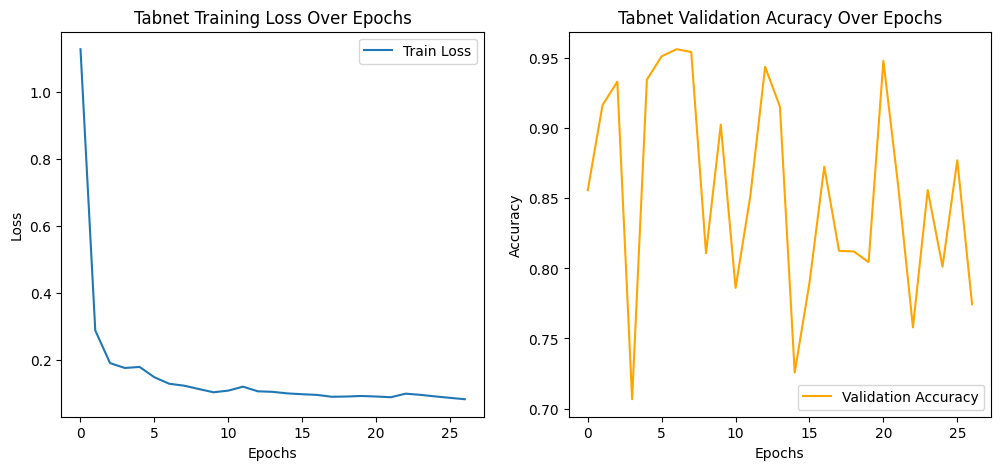

In [10]:
import matplotlib.pyplot as plt

# Extract training history

clf = tabnet.model

print(clf.history.history.keys())

train_loss = clf.history["loss"]
val_metric = clf.history["val_accuracy"]  # Replace with "val_accuracy" if using accuracy

# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label="Train Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Tabnet Training Loss Over Epochs")
plt.legend()

# Plot Evaluation Metric
plt.subplot(1, 2, 2)
plt.plot(val_metric, label="Validation Accuracy", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Tabnet Validation Acuracy Over Epochs")
plt.legend()

plt.show()


#### From loaded

2025-03-07 00:41:53,378 - INFO - Model loaded from models\ml\logreg.zip
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `ze

0.828169395210391

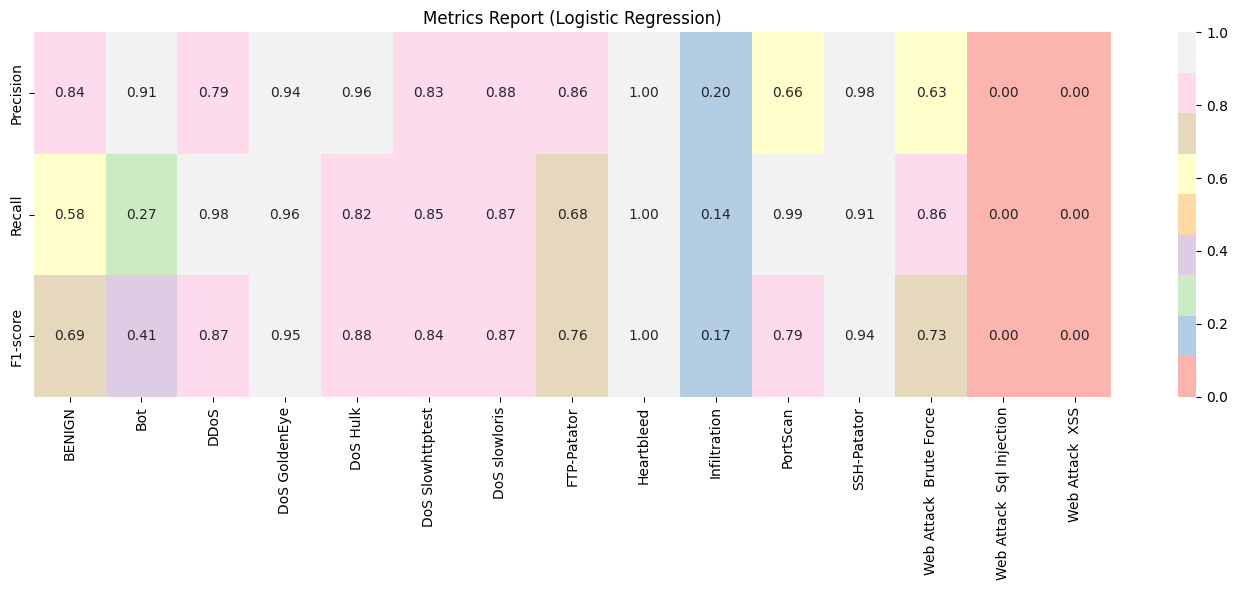

In [17]:
logreg.load_model("logreg")
logreg_results = evaluate(logreg, "Logistic Regression", X_test, y_test)
logreg_results["accuracy"]

2025-03-07 00:41:54,731 - INFO - Model loaded from models\ml\svc.zip
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

0.8365579759166554

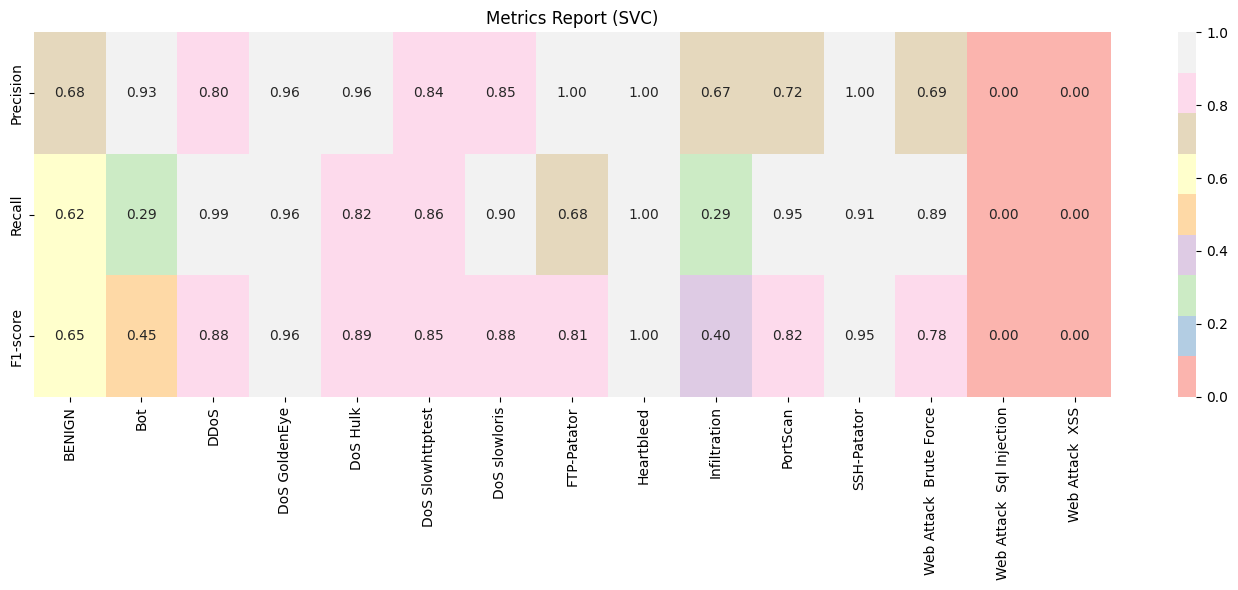

In [18]:
svc.load_model("svc")
svc_results = evaluate(svc, "SVC", X_test, y_test)
svc_results["accuracy"]

2025-03-07 00:41:55,488 - INFO - Model loaded from models\ml\randomforest.zip
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. U

0.9827492896766338

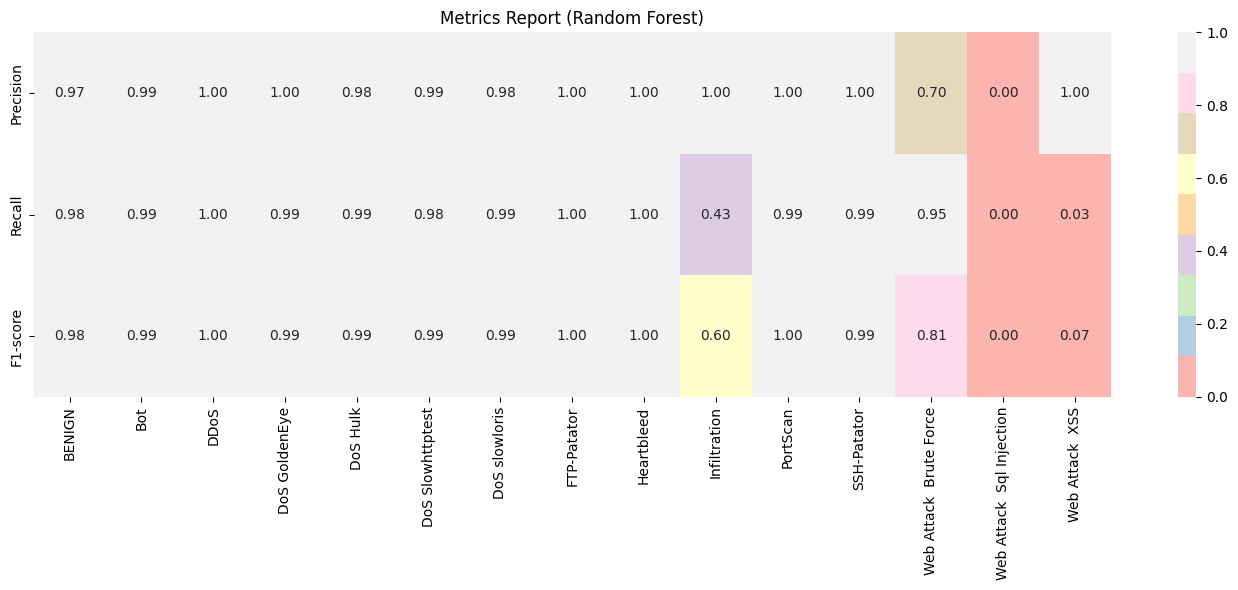

In [19]:
randomforest.load_model("randomforest")
randomforest_results = evaluate(randomforest, "Random Forest", X_test, y_test)
randomforest_results["accuracy"]

2025-03-07 00:41:56,554 - INFO - Model loaded from models\ml\kneighbors.zip
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", li

0.9620484372885942

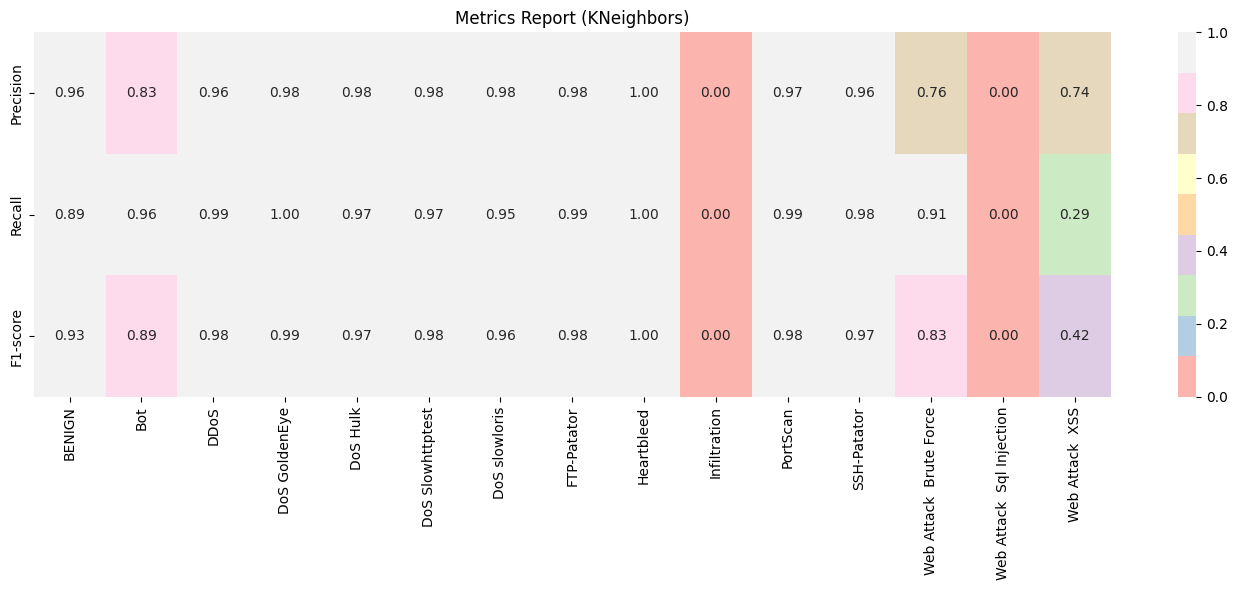

In [20]:
kneighbors.load_model("kneighbors")
kneighbors_results = evaluate(kneighbors, "KNeighbors", X_test, y_test)
kneighbors_results["accuracy"]

2025-03-07 00:41:57,924 - INFO - Model loaded from models\ml\decision_tree.zip
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. 

0.8894601542416453

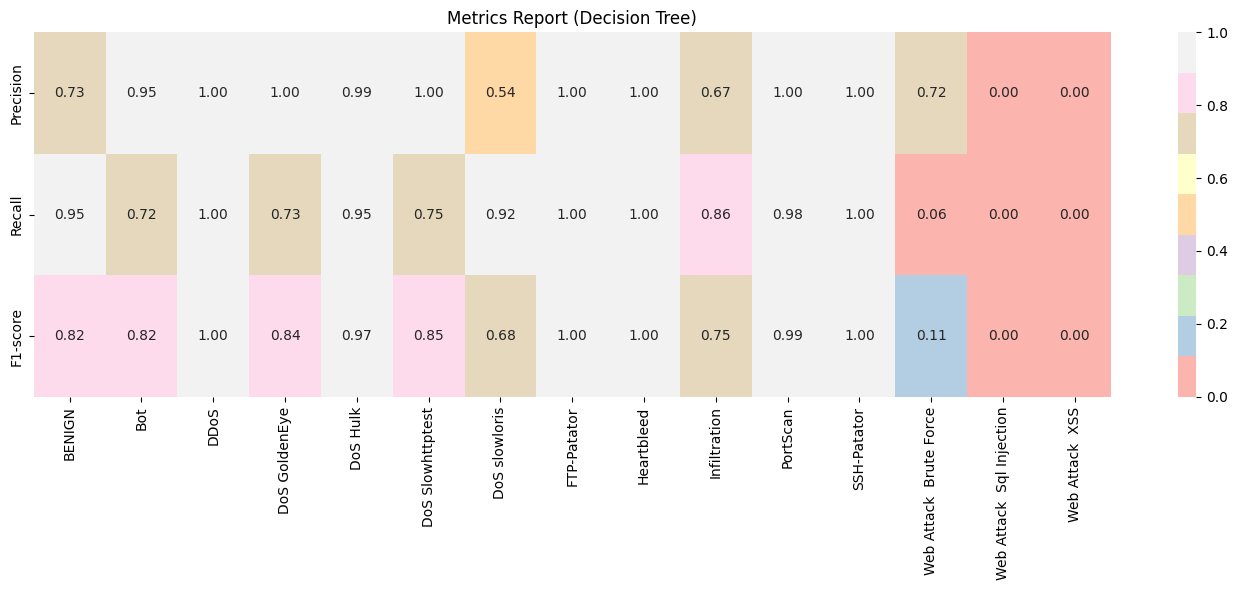

In [21]:
decision_tree.load_model("decision_tree")
decision_tree_results = evaluate(decision_tree, "Decision Tree", X_test, y_test)
decision_tree_results["accuracy"]

c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:15

0.8755242862941415

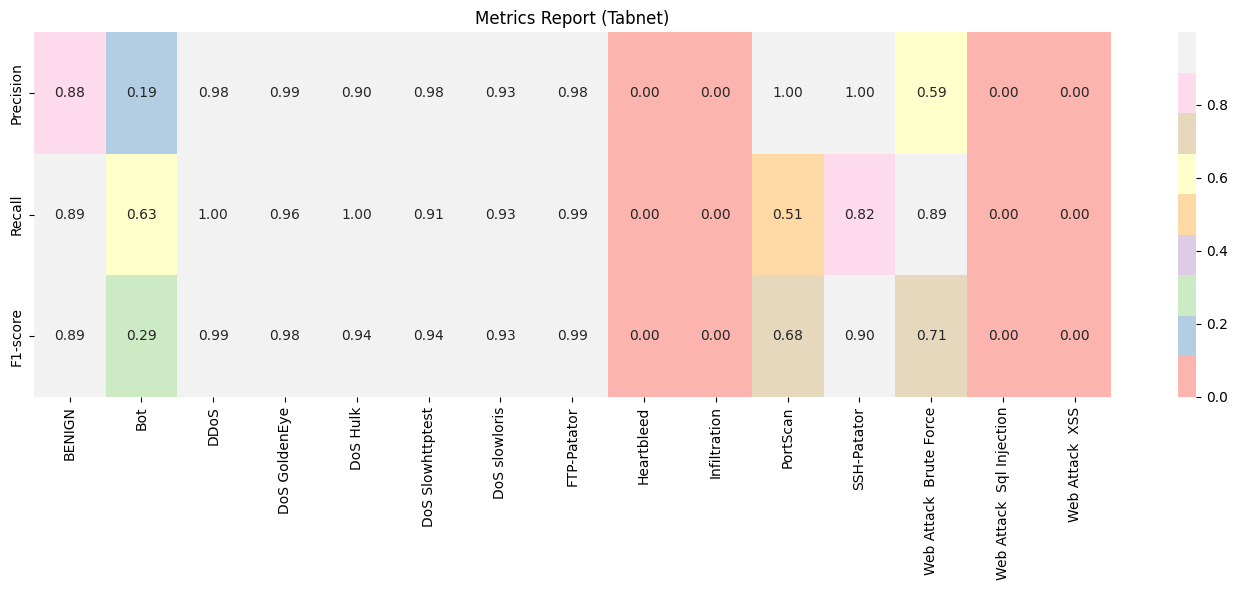

In [22]:
tabnet.load("tabnet")
tabnet_results = evaluate(tabnet, "Tabnet", X_test, y_test)
tabnet_results["accuracy"]

#### Performance

In [14]:
accuracies = [
    logreg_results["accuracy"],
    svc_results["accuracy"],
    randomforest_results["accuracy"],
    kneighbors_results["accuracy"],
    decision_tree_results["accuracy"],
    tabnet_results["accuracy"]
]

models_names = ['Logistic Regression', 'SVM', "Random Forest", "KNeighbors", "Decision Tree", "TabNet"]

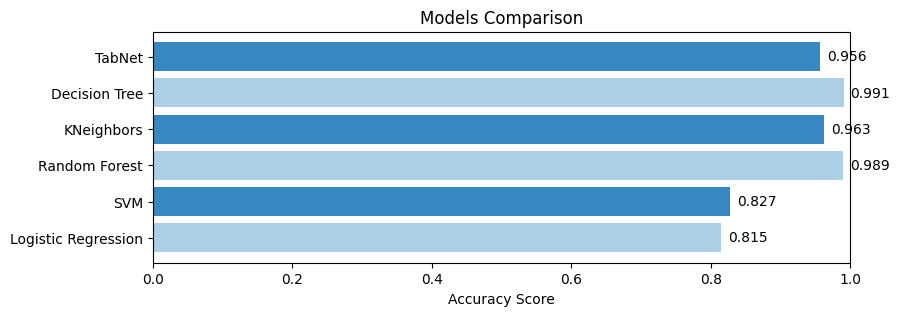

In [25]:
accuracy_plot = plot_accuracies(accuracies, models_names)